In [17]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
lending_data = pd.read_csv(Path('Resources\lending_data.csv'))
lending_data_df = pd.DataFrame(lending_data)
# Review the DataFrame
lending_data_df.head()


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [3]:
# Separate the data into labels and features

# Separate the y variable, the labels
y_original = lending_data_df['loan_status']

# Separate the X variable, the features
X_original = lending_data_df.drop(columns='loan_status')

In [4]:
# Review the X variable DataFrame
X_original.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


In [5]:
# Review the y variable Series
y_original.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [6]:
# class count
class_count_0, class_count_1 = lending_data_df['loan_status'].value_counts()

# Separate class
class_0 = lending_data_df[lending_data_df['loan_status'] == 0]
class_1 = lending_data_df[lending_data_df['loan_status'] == 1] # print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (75036, 8)
class 1: (2500, 8)


total class of 1 and0: loan_status
0    2500
1    2500
Name: count, dtype: int64


<Axes: title={'center': 'count (target)'}, xlabel='loan_status'>

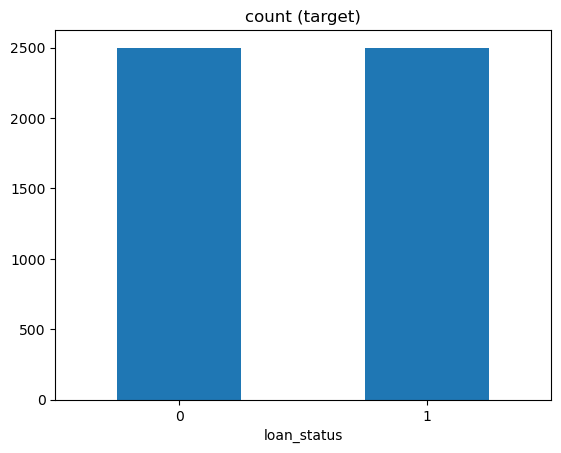

In [25]:
# Random Under-Sampling
class_0_under = class_0.sample(class_count_1)

df_undersampled = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and0:",df_undersampled['loan_status'].value_counts())# plot the count after under-sampeling
df_undersampled['loan_status'].value_counts().plot(kind='bar', rot =0, title='count (target)')

In [8]:
# Seperate the features, X,  from the target variable, y
y = df_undersampled['loan_status']
X = df_undersampled.drop(columns='loan_status')
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
22216,9300.0,7.064,47100,0.363057,3,0,17100
56725,9700.0,7.236,48700,0.383984,4,0,18700
72091,9400.0,7.116,47600,0.369748,3,0,17600
71799,9000.0,6.937,45900,0.346405,3,0,15900
20527,8000.0,6.519,41900,0.284010,2,0,11900


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [9]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=2,stratify=y)


---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [10]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=500,
                                random_state=1)
classifier

# Fit the model using training data
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [11]:
# Make a prediction using the testing data
y_pred = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
results.head(10)

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
5,0,0
6,1,1
7,0,0
8,1,1
9,1,1


In [12]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9954666666666667
Testing Data Score: 0.9968


### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [13]:
# Generate a confusion matrix for the model
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
print("Confusion Matrix")
display(cm_df)

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,625,0
Actual 1,4,621


In [14]:
# Print the classification report for the model
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       625
           1       1.00      0.99      1.00       625

    accuracy                           1.00      1250
   macro avg       1.00      1.00      1.00      1250
weighted avg       1.00      1.00      1.00      1250



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** WRITE YOUR ANSWER HERE!

In [18]:
# Create a pipeline with preprocessing and ML_classifier
def set_and_train_pipeline (scaler,ML_classifier): 
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier',ML_classifier )
        ])

    # fit the pipeline
    pipeline.fit(X_train, y_train)

    # Predict using the pipeline
    y_pred = pipeline.predict(X_test)

    # Print the classification report
    print(classification_report(y_test, y_pred))

    # return the pipeline
    return pipeline

In [21]:
# Trying with another ML engine
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier(n_estimators=800, learning_rate=0.1, random_state=1)  # Adjust hyperparameters as needed
scaler = StandardScaler()

set_and_train_pipeline(scaler,classifier)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       625
           1       1.00      0.99      1.00       625

    accuracy                           1.00      1250
   macro avg       1.00      1.00      1.00      1250
weighted avg       1.00      1.00      1.00      1250



Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 AdaBoostClassifier(learning_rate=0.1, n_estimators=800,
                                    random_state=1))])

In [24]:
from catboost import CatBoostClassifier

classifier = CatBoostClassifier(iterations=800, depth=3, learning_rate=0.1, verbose=0)  # Adjust hyperparameters as needed
scaler = StandardScaler()

set_and_train_pipeline(scaler,classifier)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       625
           1       1.00      0.99      1.00       625

    accuracy                           1.00      1250
   macro avg       1.00      1.00      1.00      1250
weighted avg       1.00      1.00      1.00      1250



Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x00000164A2059160>)])

---